# Does faculty salary vary by gender and/or rank?

## Set up

Before getting started, the only addtional library you should have to install (that did not come with the anaconda python distribution) is `seaborn`, a package for visualization. Execute this command on your terminal.

```
pip install seaborn
```

Let's begin by reading in some data from [this course website](http://data.princeton.edu/wws509/datasets/#salary). Columns included are:

- **sx** = Sex, coded 1 for female and 0 for male
- **rk** = Rank, coded
    - 1 for assistant professor,
    - 2 for associate professor, and
    - 3 for full professor
- **yr** = Number of years in current rank
- **dg** = Highest degree, coded 1 if doctorate, 0 if masters
- **yd** = Number of years since highest degree was earned
- **sl** = Academic year salary, in dollars.

In [14]:
# Set up
import numpy as np
import pandas as pd
import seaborn as sns # for visualiation
import urllib.request # to load data
from scipy import stats # ANOVA
from scipy.stats import ttest_ind # t-tests
import statsmodels.formula.api as smf # linear modeling
import matplotlib.pyplot as plt # plotting
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline 

In [43]:
# Read data from URL
data = urllib.request.urlopen('http://data.princeton.edu/wws509/datasets/salary.dat')
salary_data = pd.read_table(data, sep='\s+')

## Descriptive statistics by gender

Before doing any statistical tests, you should get a basic feel for the gender breakdown in your dataset

In [16]:
# What is the number of males/females in the dataset? What does this already tell you...?


sx
female    14
male      38
dtype: int64

In [17]:
# What is the mean salary by sex? Hint: you'll have to groupby sex (`sx`)


,yr,yd,sl
sx,,,
female,4.071429,14.642857,21357.142857
male,8.736842,16.657895,24696.789474


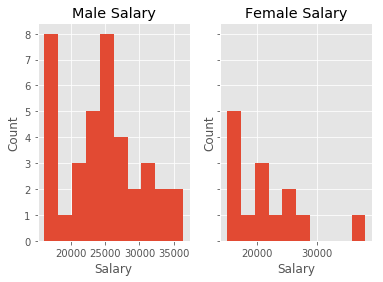

In [18]:
# Draw histograms for the distribution of salaries for males and females (separately)
# Hint: you can use the `.hist` method, and specify what you want to separate *by*
# The x and y axes should be consistent between the graphs


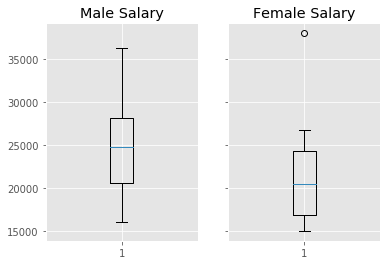

In [19]:
# Create a boxplot of the salaries by sex -- don't worry if you get a warning here.


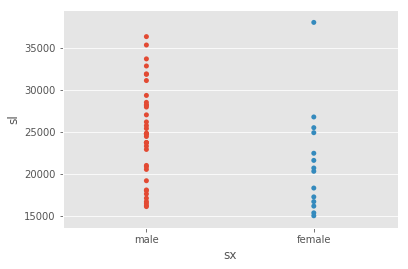

In [20]:
# Show salary distributions for males and females in a stripplot (jittered density plot)
# Use the sns.stripplot method


## Test for a difference in means by gender
Use a t-test to see if there is a significant difference in means

In [21]:
# Separate males and females into different variables


In [22]:
# Test for difference using `ttest_ind`


Ttest_indResult(statistic=1.8474402832932844, pvalue=0.070603936443905682)

## Descriptive Statistics by Rank

Text(0,0.5,'Count')

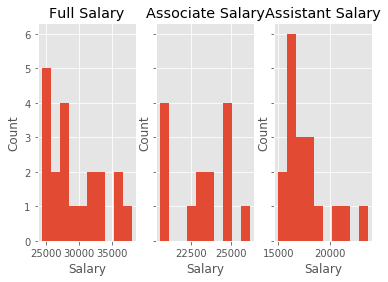

In [23]:
# Draw histograms for the distribution of salaries by rank


## Test for differences in means by rank

First, we'll want to leverage the **t-test** to test for differences by rank. To do this, we'll need to first break the dataset into two groups (full professors, not-full professors), then perform our t-test.

In [24]:
# Separate into different variables by rank (full, not_full)

# Test for difference


Ttest_indResult(statistic=9.1336144407164603, pvalue=3.0965017065059518e-12)

Alternatively, we could use an **Analysis of Variance (ANOVA)** test to assess the statistical significance in differences across multiple groups (an extension of the t-test)

In [27]:
# Use the ANOVA method to test for differences in means across multiple groups
# Use the `stats.f_oneway` method to perform the test


F_onewayResult(statistic=83.422912751664256, pvalue=3.0965017065059574e-12)

## How does salary (`sl`) compare to years since degress (`yd`) and years in current rank (`yr`)?

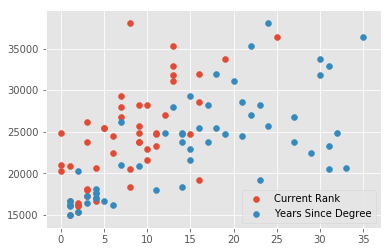

In [39]:
# Create scatterplots to show how salary compares to years since degree / in current rank
# Show these at the same time


## How does salary vary across rank and sex?

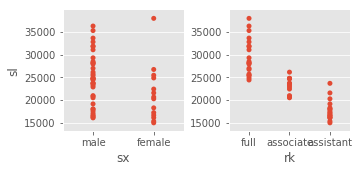

In [50]:
# Create stripplots of salary by sex and by rank placed next to one another
# Hint: you can use `sns.PairGrid`


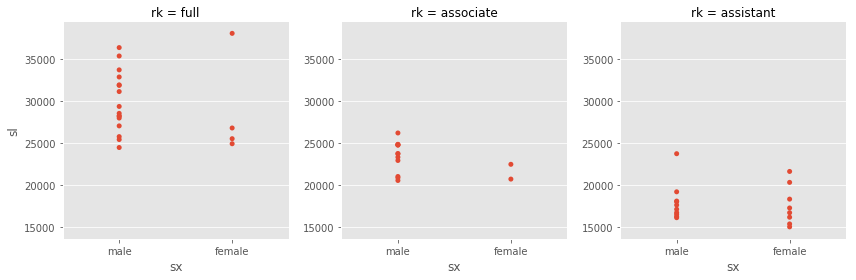

In [56]:
# Create different stripplots of salary (by gender) for each rank


In [ ]:
# What does this tell you about gender discrimination on the faculty?
# There are much fewer female positions than male in all ranks. Female professors also seem to be
# get paid less than male professors overall 